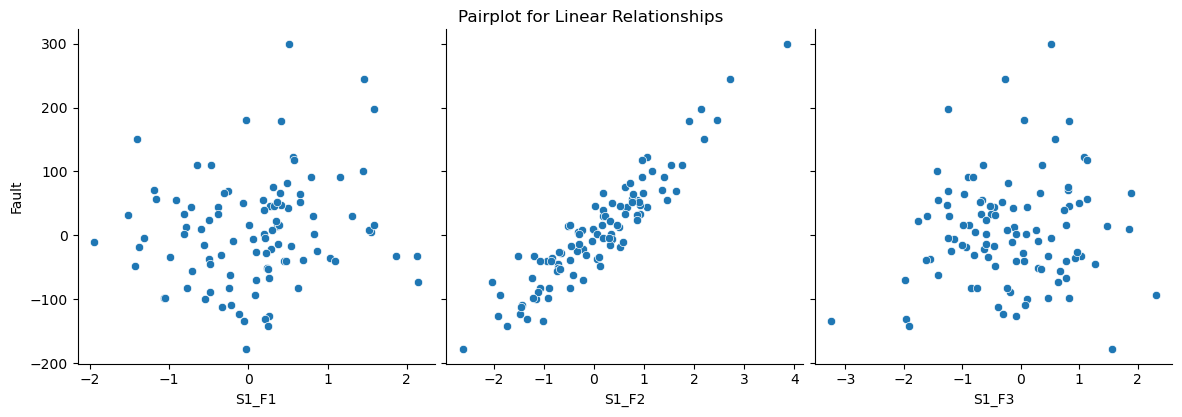

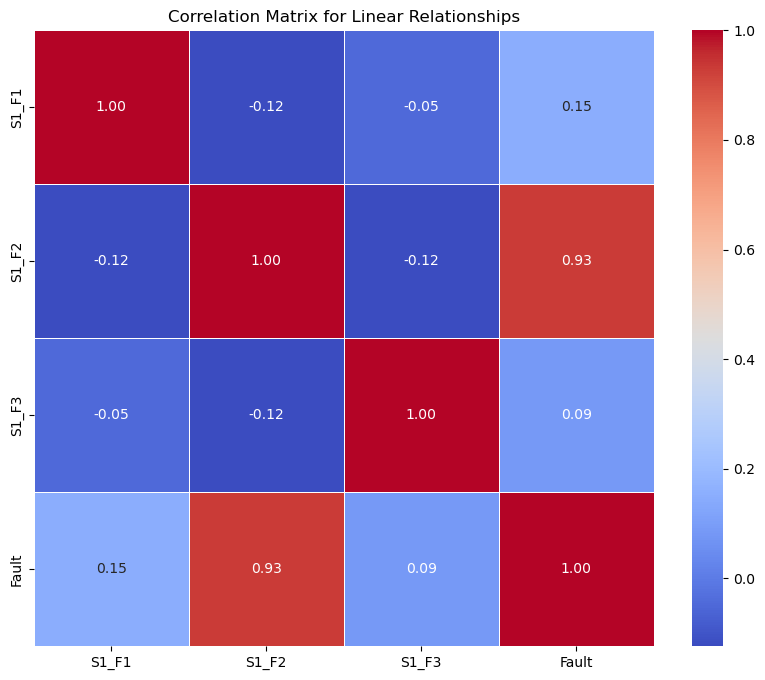

Epoch 1/20
4/4 [==============================] - 5s 335ms/step - loss: 7357.5146 - val_loss: 4097.3667
Epoch 2/20
4/4 [==============================] - 0s 19ms/step - loss: 7355.9839 - val_loss: 4098.5181
Epoch 3/20
4/4 [==============================] - 0s 25ms/step - loss: 7355.1660 - val_loss: 4100.3594
Epoch 4/20
4/4 [==============================] - 0s 22ms/step - loss: 7354.2349 - val_loss: 4103.9658
Epoch 5/20
4/4 [==============================] - 0s 22ms/step - loss: 7353.3188 - val_loss: 4106.6064
Epoch 6/20
4/4 [==============================] - 0s 22ms/step - loss: 7352.8188 - val_loss: 4109.4287
Epoch 7/20
4/4 [==============================] - 0s 32ms/step - loss: 7351.7607 - val_loss: 4112.5947
Epoch 8/20
4/4 [==============================] - 0s 23ms/step - loss: 7350.4097 - val_loss: 4116.1865
Epoch 9/20
4/4 [==============================] - 0s 24ms/step - loss: 7348.9590 - val_loss: 4120.9370
Epoch 10/20
4/4 [==============================] - 0s 24ms/step - loss: 

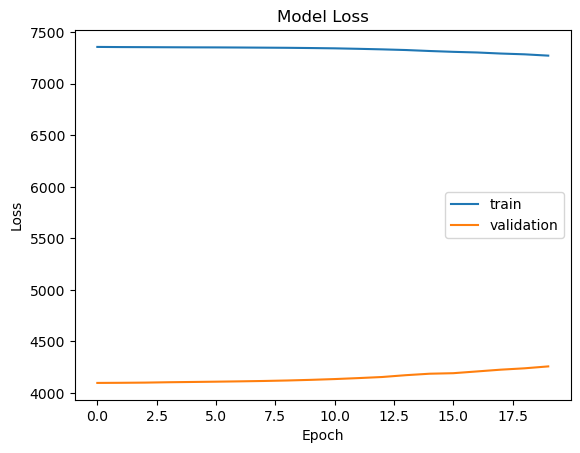

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
data = pd.read_csv(r"C:\Users\athar\Downloads\Processed_final_data.csv")
# Generating random data for demonstration
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

# Creating a DataFrame
data = pd.DataFrame(X, columns=['S1_F1','S1_F2','S1_F3'])
data['Fault'] = y

# Pairplot for scatter plots and histograms
sns.pairplot(data, x_vars=['S1_F1','S1_F2','S1_F3'], y_vars=['Fault'], height=4)
plt.suptitle('Pairplot for Linear Relationships', y=1.02)
plt.show()

# Correlation matrix
correlation_matrix = data.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Linear Relationships')
plt.show()

# Function to split data into training and testing sets
def split_data(data):
    X = data.drop(["Fault"], axis=1)
    y = data["Fault"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(data)

# Function to create sequences for LSTM
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Create sequences
time_steps = 5
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, X_train_seq.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_seq)
mse = mean_squared_error(y_test_seq, y_pred)
mae = mean_absolute_error(y_test_seq, y_pred)
r2 = r2_score(y_test_seq, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plotting the loss over epochs
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
